In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [7]:
data=pd.read_csv('Telecom_customer_churn.csv')
data.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


### Checking for null values in the data set

In [4]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking the datatypes of the columns

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Checking for empty values

In [10]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Empty values in column 
    count = (column == ' ').sum()
    print('Count of empty values in column ', column_name, ' is : ', count)

Count of empty values in column  customerID  is :  0
Count of empty values in column  gender  is :  0
Count of empty values in column  SeniorCitizen  is :  0
Count of empty values in column  Partner  is :  0
Count of empty values in column  Dependents  is :  0
Count of empty values in column  tenure  is :  0
Count of empty values in column  PhoneService  is :  0
Count of empty values in column  MultipleLines  is :  0
Count of empty values in column  InternetService  is :  0
Count of empty values in column  OnlineSecurity  is :  0
Count of empty values in column  OnlineBackup  is :  0
Count of empty values in column  DeviceProtection  is :  0
Count of empty values in column  TechSupport  is :  0
Count of empty values in column  StreamingTV  is :  0
Count of empty values in column  StreamingMovies  is :  0
Count of empty values in column  Contract  is :  0
Count of empty values in column  PaperlessBilling  is :  0
Count of empty values in column  PaymentMethod  is :  0
Count of empty val

### Replacing the empty values with the null values

In [11]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

### Changing the datatype of the column

In [13]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [14]:
data['TotalCharges'].dtype

dtype('float64')

### Checking for null values again

In [15]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Handling the null values

In [16]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [18]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Making dataframe for the Nominal data

In [20]:
data_nominal=data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]
data_nominal

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Visualization of the Nominal data

Male      3555
Female    3488
Name: gender, dtype: int64


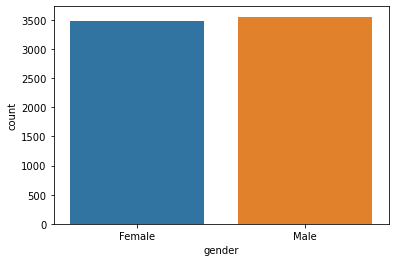

In [21]:
ax=sns.countplot(x='gender',data=data_nominal)
print(data_nominal['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


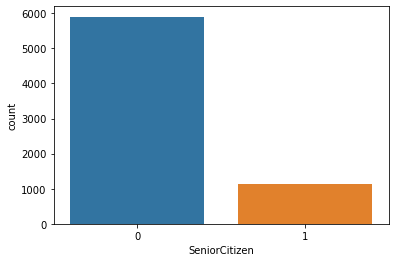

In [22]:
ax=sns.countplot(x='SeniorCitizen',data=data_nominal)
print(data_nominal['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


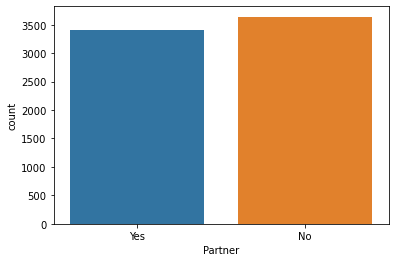

In [23]:
ax=sns.countplot(x='Partner',data=data_nominal)
print(data_nominal['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


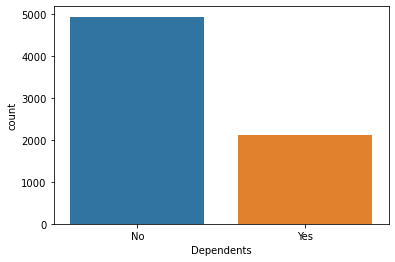

In [24]:
ax=sns.countplot(x='Dependents',data=data_nominal)
print(data_nominal['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


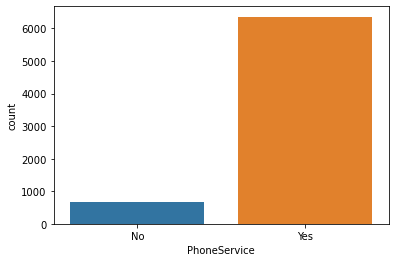

In [25]:
ax=sns.countplot(x='PhoneService',data=data_nominal)
print(data_nominal['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


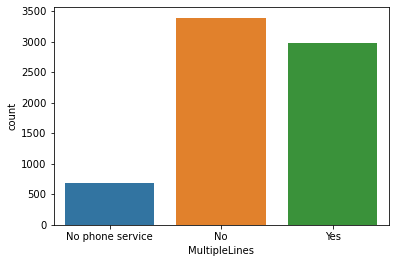

In [26]:
ax=sns.countplot(x='MultipleLines',data=data_nominal)
print(data_nominal['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


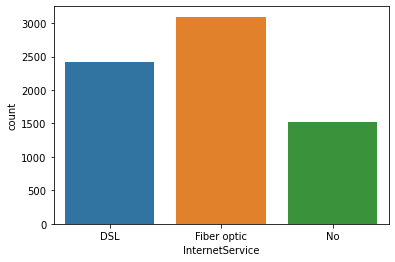

In [27]:
ax=sns.countplot(x='InternetService',data=data_nominal)
print(data_nominal['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


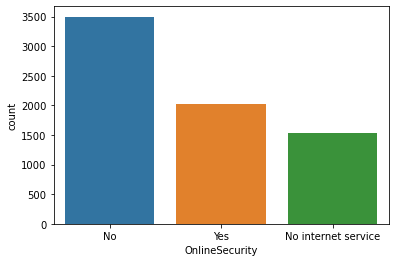

In [28]:
ax=sns.countplot(x='OnlineSecurity',data=data_nominal)
print(data_nominal['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


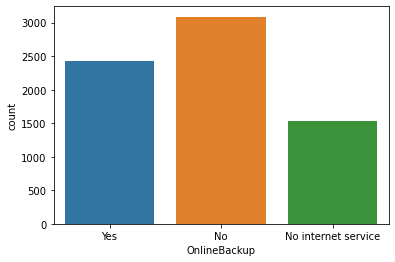

In [29]:
ax=sns.countplot(x='OnlineBackup',data=data_nominal)
print(data_nominal['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


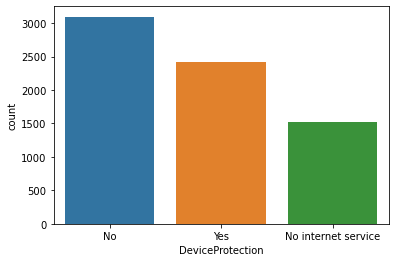

In [30]:
ax=sns.countplot(x='DeviceProtection',data=data_nominal)
print(data_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


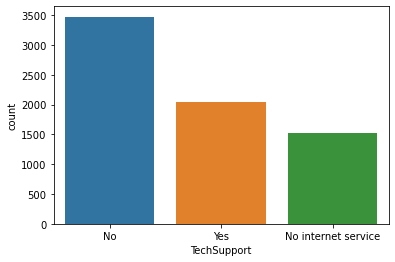

In [31]:
ax=sns.countplot(x='TechSupport',data=data_nominal)
print(data_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


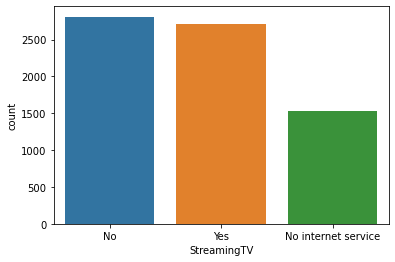

In [32]:
ax=sns.countplot(x='StreamingTV',data=data_nominal)
print(data_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


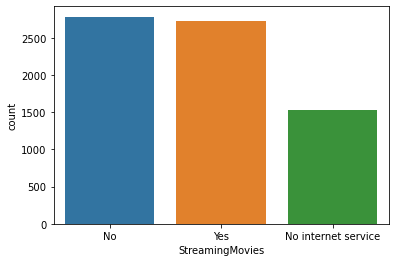

In [33]:
ax=sns.countplot(x='StreamingMovies',data=data_nominal)
print(data_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


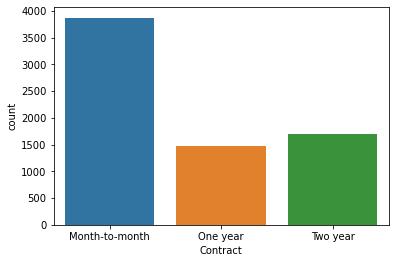

In [34]:
ax=sns.countplot(x='Contract',data=data_nominal)
print(data_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


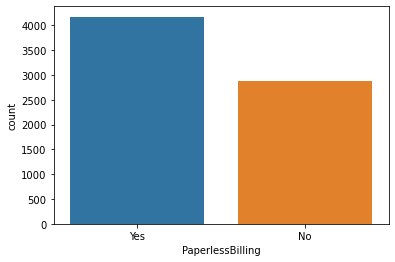

In [35]:
ax=sns.countplot(x='PaperlessBilling',data=data_nominal)
print(data_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


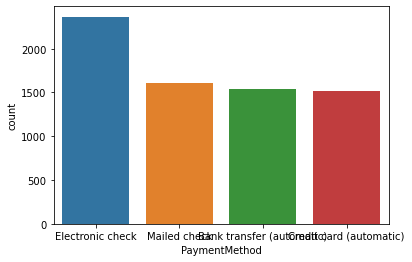

In [36]:
ax=sns.countplot(x='PaymentMethod',data=data_nominal)
print(data_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


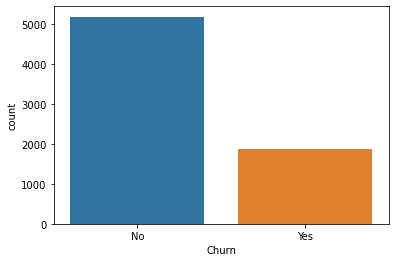

In [37]:
ax=sns.countplot(x='Churn',data=data_nominal)
print(data_nominal['Churn'].value_counts())

### Making data of the ordinal data

In [38]:
data_ordinal=data[['customerID','tenure']]

In [39]:
data_ordinal

,customerID,tenure
0,7590-VHVEG,1
1,5575-GNVDE,34
2,3668-QPYBK,2
3,7795-CFOCW,45
4,9237-HQITU,2
...,...,...
7038,6840-RESVB,24
7039,2234-XADUH,72
7040,4801-JZAZL,11
7041,8361-LTMKD,4


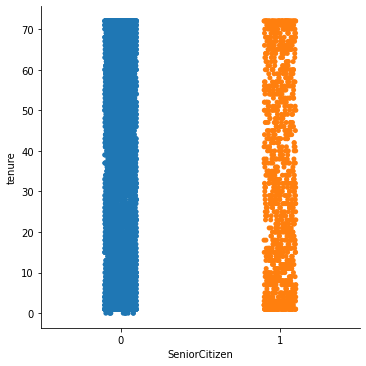

In [41]:
sns.catplot(x='SeniorCitizen',y='tenure',data=data)

### Checking the distribution of the continuous data

In [42]:
data_continuous=data[['MonthlyCharges','TotalCharges']]
data_continuous

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


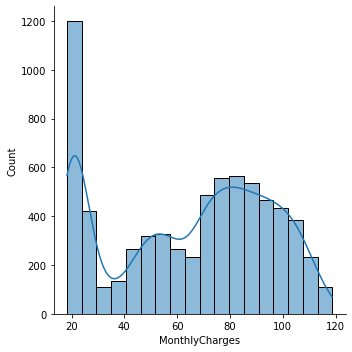

In [44]:
sns.displot(data_continuous['MonthlyCharges'],kde=True)

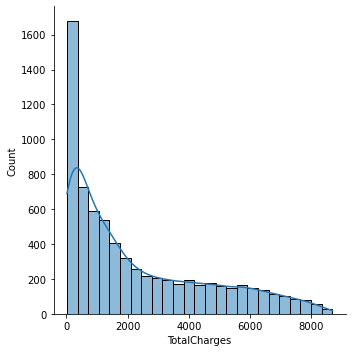

In [45]:
sns.displot(data_continuous['TotalCharges'],kde=True)

### Encoding the dataset

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
enc=OrdinalEncoder()

In [48]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [49]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


### Describe the dataset

In [50]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

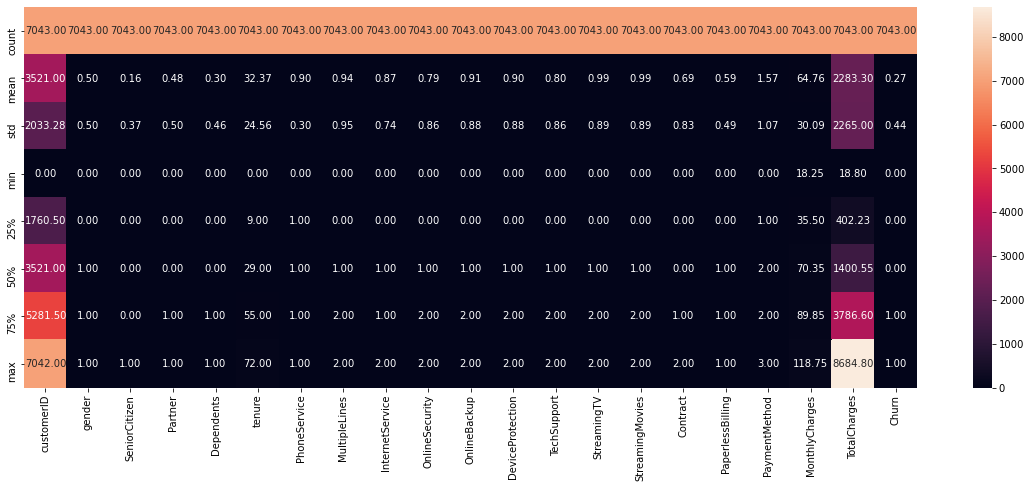

In [51]:
plt.figure(figsize=(20,7))
sns.heatmap(data.describe(),annot=True,fmt='0.2f')

### Correlation of the columns

In [55]:
data.corr()['Churn']

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199428
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

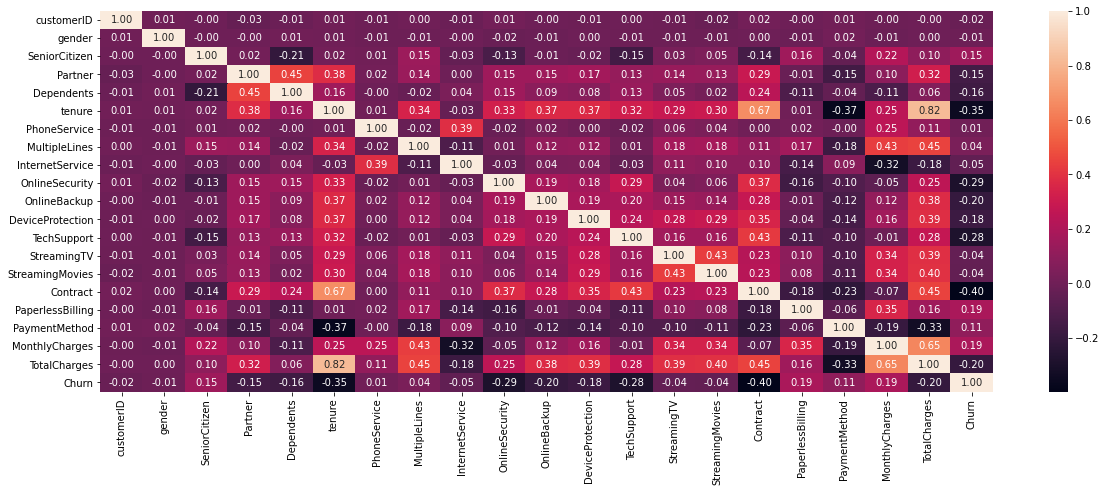

In [53]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

#### Checking the columns which are possitively and negatively correlated with the target column

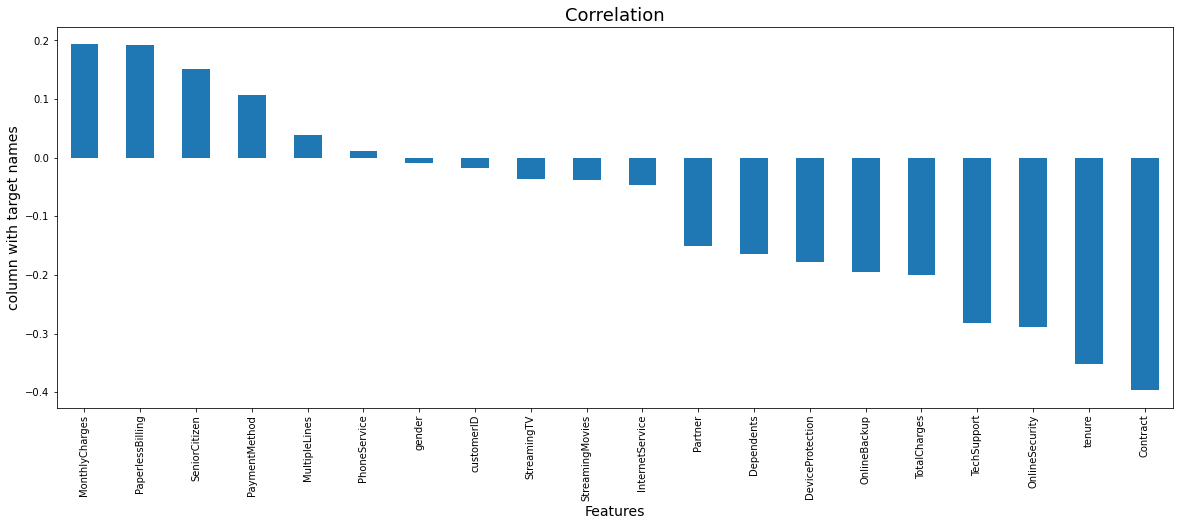

In [56]:
plt.figure(figsize=(20,7))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Checking outliers using boxplot

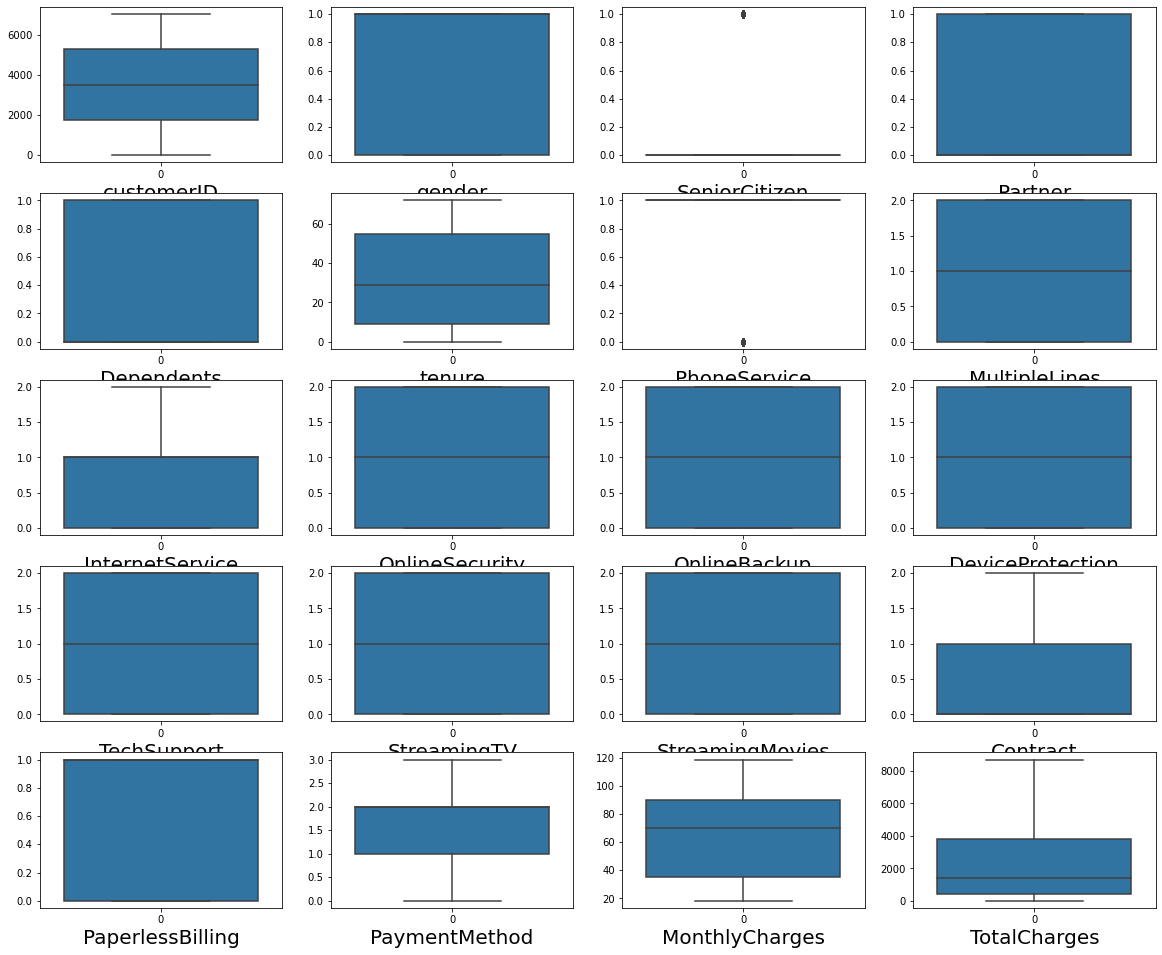

In [57]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

No outliers present in the dataset 

### Removing columns which has less relationship with the target variable

In [58]:
data_new=data.drop(columns=['customerID','gender','PhoneService'])

In [59]:
data_new

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,0,0.0,0.0,34,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,0,0.0,0.0,2,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,0,0.0,0.0,45,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0,1.0,1.0,72,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0,1.0,1.0,11,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1,1.0,0.0,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


#### Checking skewness

In [60]:
data_new.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Since the columns in which the skewness present are the categorical columns hence we will not treat that

### Dividing the Dataset into dependent and independent variable

In [61]:
x=data_new.drop(columns='Churn')
y=data_new['Churn']

In [62]:
x

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1.0,0.0,1,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,0,0.0,0.0,34,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,0,0.0,0.0,2,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,0,0.0,0.0,45,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50
7039,0,1.0,1.0,72,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90
7040,0,1.0,1.0,11,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45
7041,1,1.0,0.0,4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60


In [63]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

### Scaling the data using StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.33486261,
         0.32033821, -0.87277729],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.47405205,
         1.35896134,  2.01391739]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.145161,SeniorCitizen
1,1.460950,Partner
2,1.381447,Dependents
3,7.211542,tenure
4,1.351705,MultipleLines
5,1.250016,InternetService
6,1.267131,OnlineSecurity
7,1.217264,OnlineBackup
8,1.292651,DeviceProtection
9,1.320819,TechSupport


There lies the multicollinearity between columns so we have to remove it

In [68]:
x=x.drop(columns='tenure')

In [69]:
x

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50
7039,0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90
7040,0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45
7041,1,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60


In [70]:
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.33486261,
         0.32033821, -0.87277729],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.47405205,
         1.35896134,  2.01391739]])

In [71]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.143264,SeniorCitizen
1,1.442456,Partner
2,1.380732,Dependents
3,1.340029,MultipleLines
4,1.249924,InternetService
5,1.265979,OnlineSecurity
6,1.217095,OnlineBackup
7,1.291037,DeviceProtection
8,1.313141,TechSupport
9,1.418990,StreamingTV


Now all the values are less than 5 so we will move ahead

### Finding the best random state

In [73]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.8194207836456558 on Random State  150


### Splitting data Into Training and test data

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=150)

### Logistic Regression

In [87]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

81.94207836456559
[[1192  127]
 [ 216  226]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1319
         1.0       0.64      0.51      0.57       442

    accuracy                           0.81      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.81      0.80      1761



### Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  74.61669505962521
[[1089  230]
 [ 217  225]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1319
         1.0       0.49      0.51      0.50       442

    accuracy                           0.75      1761
   macro avg       0.66      0.67      0.67      1761
weighted avg       0.75      0.75      0.75      1761



### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  80.465644520159
[[1189  130]
 [ 214  228]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1319
         1.0       0.64      0.52      0.57       442

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.80      1761



### SVC

In [88]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  80.52243043725156
[[1192  127]
 [ 216  226]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1319
         1.0       0.64      0.51      0.57       442

    accuracy                           0.81      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.81      0.80      1761



Logistic Regression ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

In [86]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.7941219998064393


In [81]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.7261086400735532


In [82]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.7885869652880831


In [84]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.796820762629847


Logistic Regression is Performing better among all so we will continue with Logistic Regression

### ROC AUC plot

<function matplotlib.pyplot.show(close=None, block=None)>

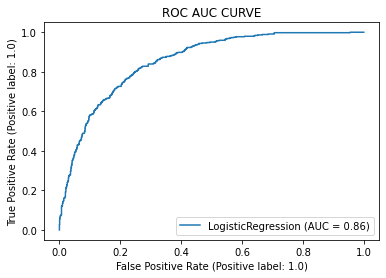

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show

Since Logistic Regression is performing best and it is not capabile of hyperparameter tuning ,So we choose Logistic Regression as the final model

## Documentation

In [ ]:
Import the csv file then seen the data we found some empty values in the columns so we delt with that.
After that we replace the empty values with the null values and then we dealt with that.
After that we made the seperate DataFrame of the categorical and the continuous data.
Then the vizualization of the categorical and continuous data is done .
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['customerID','gender','PhoneService'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and no outliers found.
After that we divide the dataset in dependent and independent variables.
After that we check for skewness and some skewness is found in the columns but we did not remove them Since the columns in which the skewness present are the categorical columns hence we will not treat that
After scaling the data we checked for multicollinearity and no multicollinearity is found between columns.
After that we trained the model with several algorithms and found Logistic regression as the best algo for classification problem.
Hyperparameter tuning is not done since it is not applicable for Logistic regression.
In the last we saved the model.